<a href="https://colab.research.google.com/github/JakeOh/202511_BD53/blob/main/lab_python/da13_apt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab에서 한글 폰트 사용하기

## Step 1. Colab 런타임에 한글 폰트 설치

In [1]:
# Jupyter Notebook에서 리눅스 명령어를 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 1 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (43.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 117528 files and direct

## Step 2. Colab 런타임 재시작

# Step 3. `matplotlib.pyplot` 모듈에서 한글 폰트를 사용하도록 설정

In [1]:
import matplotlib.pyplot as plt

# pyplot 모듈에서 기본으로 사용할 폰트 계열을 나눔바른고딕으로 설정.
plt.rc('font', family='NanumBarunGothic')

# 한글 폰트 테스트

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.DataFrame(data={
    '시군구': ['서초구', '강남구', '송파구'],
    '가격': [9_000, 10_000, 8_500]
})
df

,시군구,가격
0,서초구,9000
1,강남구,10000
2,송파구,8500


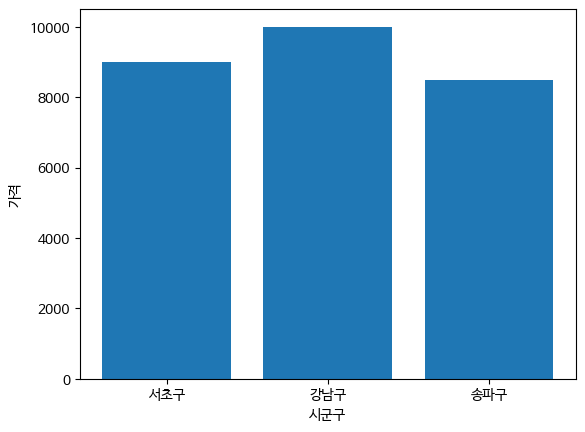

In [4]:
plt.bar(x=df['시군구'], height=df['가격'])
plt.xlabel('시군구')
plt.ylabel('가격')
plt.show()

# 아파트 실거래가 데이터 분석

*   [apt_202504.csv](https://github.com/JakeOh/202511_BD53/raw/refs/heads/main/datasets/apt_202504.csv) 파일을 읽고 DataFrame 생성
    *   첫 15줄은 파일 설명 문서 -> skip
    *   encoding 파라미터 설정(한글 인코딩: euc-kr)
    *   '가격' 컬럼에는 숫자 자릿수를 구분하는 comma가 사용되고 있음(예: 10,000)
        *   '가격' 컬럼은 숫자 타입이어야 함!
    *   일부 컬럼에서는 '-' 문자열이 NA(Not Available, 값이 없음)의 의미로 사용되고 있음.
        *   '-'는 NA로 대체.
*   데이터 프레임 파악
    *   info, head, tail, describe, dtypes, ...
*   '시군구' 컬럼의 값을 이용해서, province 파생 변수(광역시도)를 만듦.
    *   '인천광역시 부평구 부평동' -> '인천광역시'
    *   '충청남도 천안시 서북구' -> '충청남도'
*   '시군구' 컬럼의 값을 이용해서, county 파생 변수(시/군/구)를 만듦.
    *   '인천광역시 부평구 부평동' -> '부평구'
    *   '충청남도 천안시 서북구' -> '천안시'
*   '계약년월' 컬럼의 값을 이용해서, year(계약년도), month(계약월) 파생 변수 만듦.
    *   202504 -> 2025(year), 4(month)
*   서울특별시 아파트들의 구별 아파트 가격의 개수, 평균, 최솟값, 최댓값
*   광역시도별 아파트 가격 개수, 평균, 최솟값, 최댓값
*   면적이  $84 m^2$  이상  $100 m^2$  미만의 서울특별시 아파트들 중에서, 구별 아파트 가격 개수, 평균, 최솟값, 최댓값
*   면적이 $84 m^2$ 이상 $100 m^2$ 미만의 아파트들 중에서, 광역시도별 아파트 가격 개수, 평균, 최솟값, 최댓값
    *   결과를 평균의 내림차순으로 정렬해서 출력
    *   결과를 최댓값의 내림차순으로 정렬해서 출력
    *   결과를 최솟값의 오름차순으로 정렬해서 출력

# 데이터프레임 생성

In [5]:
file_path = 'https://github.com/JakeOh/202511_BD53/raw/refs/heads/main/datasets/apt_202504.csv'

In [14]:
apt = pd.read_csv(file_path,
                  skiprows=15,          # 파일에서 읽지 않고 건너 뛸 줄(line) 개수.
                  encoding='euc-kr',    # 파일 인코딩 타입.
                  thousands=',',        # 숫자에서 천자리 구분자로 사용된 문자.
                  na_values='-')        # NA(Null)로 취급할 문자열.

In [15]:
apt.head()

/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,NaN,3,개인,개인,1983,길주남로90번길 45,NaN,중개거래,인천 부평구,NaN
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,NaN,23,개인,개인,2023,인하로222번길 20,NaN,중개거래,인천 미추홀구,NaN
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,NaN,22,개인,개인,2021,염전로 414,NaN,중개거래,인천 미추홀구,NaN
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,2,15,개인,개인,1986,마장로42길 16,NaN,직거래,NaN,25.04.30
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,NaN,20,개인,개인,1997,제기로 131,NaN,중개거래,서울 동대문구,NaN


In [16]:
apt.tail()

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자
36969,36970,경기도 안산시 상록구 사동,1639,1639,0,그랑시티자이2차,84.9921,202504,1,69000,NaN,27,개인,개인,2020,해양5로 17,NaN,중개거래,"경기 시흥시, 경기 안산시 상록구",NaN
36970,36971,경기도 안산시 상록구 사동,1639,1639,0,그랑시티자이2차,84.9712,202504,1,68000,NaN,5,개인,개인,2020,해양5로 17,NaN,중개거래,"경기 안산시 상록구, 서울 구로구",NaN
36971,36972,경기도 안산시 상록구 사동,1506,1506,0,본오,38.1300,202504,1,12400,NaN,4,개인,개인,1992,선진로 108,NaN,중개거래,경기 안산시 상록구,NaN
36972,36973,경기도 성남시 분당구 야탑동,156,156,0,목련마을(영남),84.9300,202504,1,86500,NaN,12,개인,개인,1995,판교로 669,NaN,중개거래,경기 성남시 분당구,NaN
36973,36974,울산광역시 동구 전하동,682-1,682,1,삼전아이필하모니,84.5300,202504,1,21500,NaN,15,개인,개인,2006,방어진순환도로 733,NaN,중개거래,울산 동구,NaN


In [17]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36974 entries, 0 to 36973
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NO        36974 non-null  int64  
 1   시군구       36974 non-null  object 
 2   번지        36973 non-null  object 
 3   본번        36974 non-null  int64  
 4   부번        36974 non-null  int64  
 5   단지명       36974 non-null  object 
 6   전용면적(㎡)   36974 non-null  float64
 7   계약년월      36974 non-null  int64  
 8   계약일       36974 non-null  int64  
 9   거래금액(만원)  36974 non-null  int64  
 10  동         5074 non-null   object 
 11  층         36974 non-null  int64  
 12  매수자       36974 non-null  object 
 13  매도자       36974 non-null  object 
 14  건축년도      36974 non-null  int64  
 15  도로명       36974 non-null  object 
 16  해제사유발생일   1191 non-null   float64
 17  거래유형      36974 non-null  object 
 18  중개사소재지    33763 non-null  object 
 19  등기일자      5659 non-null   object 
dtypes: float64(2), int64(8), obj

# 데이터 탐색

In [18]:
apt.describe()

,NO,본번,부번,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,해제사유발생일
count,36974.000000,36974.000000,36974.000000,36974.000000,36974.0,36974.000000,3.697400e+04,36974.000000,36974.000000,1.191000e+03
mean,18487.500000,820.122951,3.142587,73.912814,202504.0,14.394088,4.348493e+04,10.057040,2006.137664,2.025043e+07
std,10673.618763,710.453648,38.857493,22.468251,0.0,8.364038,4.163910e+04,6.925089,10.891869,3.079995e+01
min,1.000000,0.000000,0.000000,12.210000,202504.0,1.000000,1.200000e+03,-2.000000,1962.000000,2.025040e+07
25%,9244.250000,366.000000,0.000000,59.840000,202504.0,7.000000,1.820000e+04,5.000000,1997.000000,2.025041e+07
50%,18487.500000,703.000000,0.000000,75.532800,202504.0,14.000000,3.370000e+04,9.000000,2006.000000,2.025042e+07
75%,27730.750000,1080.000000,1.000000,84.950000,202504.0,21.000000,5.550000e+04,14.000000,2017.000000,2.025043e+07
max,36974.000000,7346.000000,5001.000000,244.470000,202504.0,30.000000,1.050000e+06,79.000000,2025.000000,2.025051e+07


해제사유발생일 컬럼은 실수(float) 타입, 등기일자 컬럼은 문자열(object)로 취급되고 있음.

In [19]:
# 해제사유발생일 컬럼의 값
apt['해제사유발생일'].unique()

array([      nan, 20250430., 20250507., 20250501., 20250506., 20250502.,
       20250504., 20250429., 20250508., 20250505., 20250428., 20250425.,
       20250426., 20250424., 20250503., 20250422., 20250423., 20250421.,
       20250420., 20250427., 20250419., 20250418., 20250417., 20250416.,
       20250415., 20250414., 20250413., 20250412., 20250411., 20250410.,
       20250409., 20250408., 20250407., 20250406., 20250405., 20250404.,
       20250403., 20250402., 20250401.])

In [20]:
# 해제사유발생일 컬럼을 날짜 타입(datetime)으로 변환.
apt['해제사유발생일'] = pd.to_datetime(apt['해제사유발생일'], format='%Y%m%d')

In [21]:
apt['해제사유발생일'].unique()

<DatetimeArray>
[                'NaT', '2025-04-30 00:00:00', '2025-05-07 00:00:00',
 '2025-05-01 00:00:00', '2025-05-06 00:00:00', '2025-05-02 00:00:00',
 '2025-05-04 00:00:00', '2025-04-29 00:00:00', '2025-05-08 00:00:00',
 '2025-05-05 00:00:00', '2025-04-28 00:00:00', '2025-04-25 00:00:00',
 '2025-04-26 00:00:00', '2025-04-24 00:00:00', '2025-05-03 00:00:00',
 '2025-04-22 00:00:00', '2025-04-23 00:00:00', '2025-04-21 00:00:00',
 '2025-04-20 00:00:00', '2025-04-27 00:00:00', '2025-04-19 00:00:00',
 '2025-04-18 00:00:00', '2025-04-17 00:00:00', '2025-04-16 00:00:00',
 '2025-04-15 00:00:00', '2025-04-14 00:00:00', '2025-04-13 00:00:00',
 '2025-04-12 00:00:00', '2025-04-11 00:00:00', '2025-04-10 00:00:00',
 '2025-04-09 00:00:00', '2025-04-08 00:00:00', '2025-04-07 00:00:00',
 '2025-04-06 00:00:00', '2025-04-05 00:00:00', '2025-04-04 00:00:00',
 '2025-04-03 00:00:00', '2025-04-02 00:00:00', '2025-04-01 00:00:00']
Length: 39, dtype: datetime64[ns]

In [22]:
# 등기일자 컬럼의 값
apt['등기일자'].unique()

array([nan, '25.04.30', '25.05.01', '25.05.02', '25.04.29', '25.04.28',
       '25.04.25', '25.04.24', '25.04.23', '25.04.22', '25.04.21',
       '25.04.18', '25.04.17', '25.04.16', '25.04.15', '25.04.14',
       '25.04.11', '25.04.10', '25.04.09', '25.04.08', '25.04.07',
       '25.04.04', '25.04.03', '25.04.02', '25.04.01'], dtype=object)

In [23]:
apt['등기일자'] = pd.to_datetime(apt['등기일자'], format='%y.%m.%d')

In [24]:
apt['등기일자'].unique()

<DatetimeArray>
[                'NaT', '2025-04-30 00:00:00', '2025-05-01 00:00:00',
 '2025-05-02 00:00:00', '2025-04-29 00:00:00', '2025-04-28 00:00:00',
 '2025-04-25 00:00:00', '2025-04-24 00:00:00', '2025-04-23 00:00:00',
 '2025-04-22 00:00:00', '2025-04-21 00:00:00', '2025-04-18 00:00:00',
 '2025-04-17 00:00:00', '2025-04-16 00:00:00', '2025-04-15 00:00:00',
 '2025-04-14 00:00:00', '2025-04-11 00:00:00', '2025-04-10 00:00:00',
 '2025-04-09 00:00:00', '2025-04-08 00:00:00', '2025-04-07 00:00:00',
 '2025-04-04 00:00:00', '2025-04-03 00:00:00', '2025-04-02 00:00:00',
 '2025-04-01 00:00:00']
Length: 25, dtype: datetime64[ns]

In [25]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36974 entries, 0 to 36973
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   NO        36974 non-null  int64         
 1   시군구       36974 non-null  object        
 2   번지        36973 non-null  object        
 3   본번        36974 non-null  int64         
 4   부번        36974 non-null  int64         
 5   단지명       36974 non-null  object        
 6   전용면적(㎡)   36974 non-null  float64       
 7   계약년월      36974 non-null  int64         
 8   계약일       36974 non-null  int64         
 9   거래금액(만원)  36974 non-null  int64         
 10  동         5074 non-null   object        
 11  층         36974 non-null  int64         
 12  매수자       36974 non-null  object        
 13  매도자       36974 non-null  object        
 14  건축년도      36974 non-null  int64         
 15  도로명       36974 non-null  object        
 16  해제사유발생일   1191 non-null   datetime64[ns]
 17  거래유형      36

In [26]:
apt.head()

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,NaN,3,개인,개인,1983,길주남로90번길 45,NaT,중개거래,인천 부평구,NaT
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,NaN,23,개인,개인,2023,인하로222번길 20,NaT,중개거래,인천 미추홀구,NaT
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,NaN,22,개인,개인,2021,염전로 414,NaT,중개거래,인천 미추홀구,NaT
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,2,15,개인,개인,1986,마장로42길 16,NaT,직거래,NaN,2025-04-30
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,NaN,20,개인,개인,1997,제기로 131,NaT,중개거래,서울 동대문구,NaT


csv 파일에서 데이터프레임을 생성할 때 날짜 타입을 설정하는 방법

In [29]:
apt = pd.read_csv(file_path, skiprows=15, encoding='euc-kr', thousands=',', na_values='-',
                  parse_dates=['해제사유발생일', '등기일자'],
                  date_format={'해제사유발생일': '%Y%m%d', '등기일자': '%y.%m.%d'})
# parse_dates 파라미터: 날짜 포맷으로 해석(parse)해야 할 컬럼 이름들의 리스트.
# date_format 파라미터: {'컬럼이름': '날짜포맷', ...} dictionary.

In [30]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36974 entries, 0 to 36973
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   NO        36974 non-null  int64         
 1   시군구       36974 non-null  object        
 2   번지        36973 non-null  object        
 3   본번        36974 non-null  int64         
 4   부번        36974 non-null  int64         
 5   단지명       36974 non-null  object        
 6   전용면적(㎡)   36974 non-null  float64       
 7   계약년월      36974 non-null  int64         
 8   계약일       36974 non-null  int64         
 9   거래금액(만원)  36974 non-null  int64         
 10  동         5074 non-null   object        
 11  층         36974 non-null  int64         
 12  매수자       36974 non-null  object        
 13  매도자       36974 non-null  object        
 14  건축년도      36974 non-null  int64         
 15  도로명       36974 non-null  object        
 16  해제사유발생일   1191 non-null   datetime64[ns]
 17  거래유형      36

In [31]:
apt.head(n=10)

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,NaN,3,개인,개인,1983,길주남로90번길 45,NaT,중개거래,인천 부평구,NaT
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,NaN,23,개인,개인,2023,인하로222번길 20,NaT,중개거래,인천 미추홀구,NaT
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,NaN,22,개인,개인,2021,염전로 414,NaT,중개거래,인천 미추홀구,NaT
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,2,15,개인,개인,1986,마장로42길 16,NaT,직거래,NaN,2025-04-30
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,NaN,20,개인,개인,1997,제기로 131,NaT,중개거래,서울 동대문구,NaT
5,6,대구광역시 달서구 월성동,89,89,0,서한맨션,84.8100,202504,30,20000,NaN,12,개인,개인,1992,학산로 15,NaT,중개거래,대구 달서구,NaT
6,7,대구광역시 달성군 구지면 응암리,1251,1251,0,대구국가산단반도유보라아이비파크2,74.9638,202504,30,18200,NaN,14,개인,개인,2020,국가산단북로60길 59,NaT,중개거래,대구 달성군,NaT
7,8,서울특별시 송파구 잠실동,44,44,0,레이크팰리스,84.8200,202504,30,262000,NaN,23,개인,개인,2006,잠실로 88,NaT,중개거래,"서울 광진구, 서울 송파구",NaT
8,9,인천광역시 중구 항동7가,27-107,27,107,라이프비취1차,72.7300,202504,30,14000,NaN,7,개인,개인,1980,축항대로86번길 47,NaT,중개거래,인천 중구,NaT
9,10,부산광역시 북구 만덕동,962,962,0,이편한세상금정산,84.9378,202504,30,46200,NaN,20,개인,개인,2021,상학로 36,NaT,중개거래,부산 북구,NaT


In [32]:
apt.tail(n=10)

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자
36964,36965,세종특별자치시 새롬동,605,605,0,새뜸마을5단지(메이저시티),59.9602,202504,1,45000,NaN,2,개인,개인,2017,새롬중앙로 19,NaT,중개거래,세종,NaT
36965,36966,경기도 고양시 일산동구 마두동,717,717,0,백마마을(쌍용),70.4300,202504,1,42500,505,13,개인,개인,1994,경의로 333,NaT,중개거래,경기 고양시 일산서구,2025-04-30
36966,36967,경기도 성남시 분당구 이매동,99,99,0,이매촌(삼환),101.9000,202504,1,152750,NaN,9,개인,개인,1994,양현로 220,NaT,중개거래,"경기 성남시 분당구, 경기 성남시 중원구",NaT
36967,36968,세종특별자치시 새롬동,614,614,0,새뜸마을12단지(금성백조예미지),84.9936,202504,1,75000,NaN,15,개인,개인,2017,새롬남로 102,NaT,중개거래,세종,NaT
36968,36969,세종특별자치시 새롬동,556,556,0,새뜸마을7단지(투머로우시티),74.5500,202504,1,50000,NaN,6,개인,개인,2017,새롬중앙로 89,NaT,중개거래,세종,NaT
36969,36970,경기도 안산시 상록구 사동,1639,1639,0,그랑시티자이2차,84.9921,202504,1,69000,NaN,27,개인,개인,2020,해양5로 17,NaT,중개거래,"경기 시흥시, 경기 안산시 상록구",NaT
36970,36971,경기도 안산시 상록구 사동,1639,1639,0,그랑시티자이2차,84.9712,202504,1,68000,NaN,5,개인,개인,2020,해양5로 17,NaT,중개거래,"경기 안산시 상록구, 서울 구로구",NaT
36971,36972,경기도 안산시 상록구 사동,1506,1506,0,본오,38.1300,202504,1,12400,NaN,4,개인,개인,1992,선진로 108,NaT,중개거래,경기 안산시 상록구,NaT
36972,36973,경기도 성남시 분당구 야탑동,156,156,0,목련마을(영남),84.9300,202504,1,86500,NaN,12,개인,개인,1995,판교로 669,NaT,중개거래,경기 성남시 분당구,NaT
36973,36974,울산광역시 동구 전하동,682-1,682,1,삼전아이필하모니,84.5300,202504,1,21500,NaN,15,개인,개인,2006,방어진순환도로 733,NaT,중개거래,울산 동구,NaT


In [35]:
# 사용하기 불펴한 컬럼 이름들을 변경
apt.rename(columns={'전용면적(㎡)': '전용면적', '거래금액(만원)': '거래금액'}, inplace=True)

In [36]:
apt.head()

,NO,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액,동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,NaN,3,개인,개인,1983,길주남로90번길 45,NaT,중개거래,인천 부평구,NaT
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,NaN,23,개인,개인,2023,인하로222번길 20,NaT,중개거래,인천 미추홀구,NaT
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,NaN,22,개인,개인,2021,염전로 414,NaT,중개거래,인천 미추홀구,NaT
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,2,15,개인,개인,1986,마장로42길 16,NaT,직거래,NaN,2025-04-30
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,NaN,20,개인,개인,1997,제기로 131,NaT,중개거래,서울 동대문구,NaT


In [38]:
apt[['전용면적', '거래금액', '건축년도']].describe()

,전용면적,거래금액,건축년도
count,36974.000000,3.697400e+04,36974.000000
mean,73.912814,4.348493e+04,2006.137664
std,22.468251,4.163910e+04,10.891869
min,12.210000,1.200000e+03,1962.000000
25%,59.840000,1.820000e+04,1997.000000
50%,75.532800,3.370000e+04,2006.000000
75%,84.950000,5.550000e+04,2017.000000
max,244.470000,1.050000e+06,2025.000000


In [39]:
# 거래금액이 최솟값 또는 최댓값인 행
apt[(apt['거래금액'] == apt['거래금액'].min()) |
    (apt['거래금액'] == apt['거래금액'].max())]

,NO,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액,동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자
7430,7431,서울특별시 강남구 압구정동,369-1,369,1,"현대2차(10,11,20,23,24,25동)",198.41,202504,23,1050000,NaN,9,개인,개인,1976,압구정로29길 71,NaT,중개거래,서울 강남구,NaT
7698,7699,전라남도 고흥군 도화면 당오리,487,487,0,뉴코아,22.68,202504,23,1200,NaN,3,개인,개인,1997,동신길 70,NaT,직거래,NaN,NaT
9811,9812,전라남도 고흥군 도화면 당오리,487,487,0,뉴코아,22.68,202504,21,1200,NaN,3,개인,개인,1997,동신길 70,NaT,직거래,NaN,2025-04-29


## 전용면적 분석

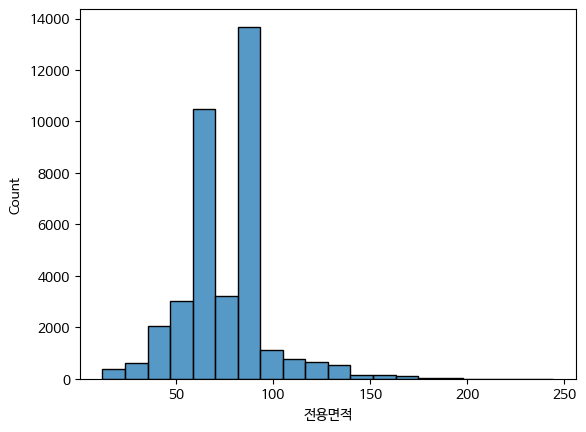

In [41]:
# 전용면적 히스토그램
sns.histplot(data=apt, x='전용면적', bins=20)
plt.show()

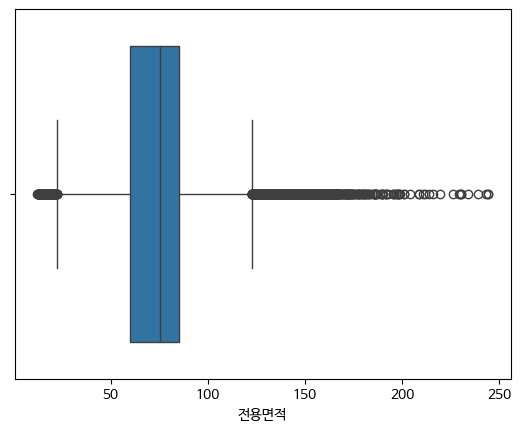

In [42]:
sns.boxplot(data=apt, x='전용면적')
plt.show()

## 거래금액

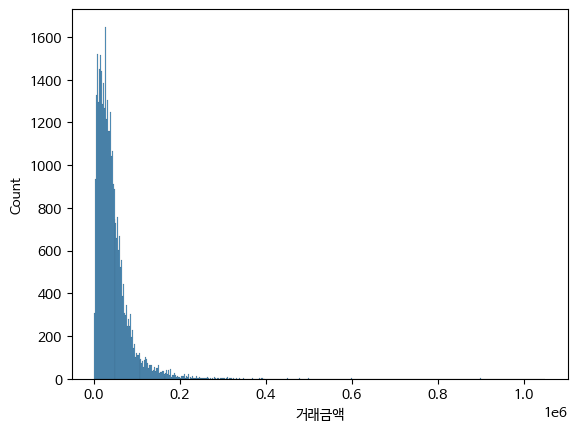

In [45]:
sns.histplot(data=apt, x='거래금액')
plt.show()

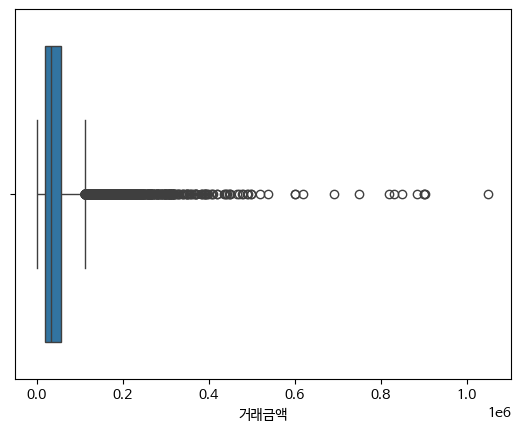

In [46]:
sns.boxplot(data=apt, x='거래금액')
plt.show()

# 파생변수 추가

In [51]:
apt['province'] = apt['시군구'].str.split().str[0]

In [52]:
apt.head()

,NO,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액,...,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,province
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,...,3,개인,개인,1983,길주남로90번길 45,NaT,중개거래,인천 부평구,NaT,인천광역시
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,...,23,개인,개인,2023,인하로222번길 20,NaT,중개거래,인천 미추홀구,NaT,인천광역시
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,...,22,개인,개인,2021,염전로 414,NaT,중개거래,인천 미추홀구,NaT,인천광역시
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,...,15,개인,개인,1986,마장로42길 16,NaT,직거래,NaN,2025-04-30,서울특별시
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,...,20,개인,개인,1997,제기로 131,NaT,중개거래,서울 동대문구,NaT,서울특별시


In [53]:
apt['county'] = apt['시군구'].str.split().str[1]

In [54]:
apt.head()

,NO,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액,...,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,province,county
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,...,개인,개인,1983,길주남로90번길 45,NaT,중개거래,인천 부평구,NaT,인천광역시,부평구
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,...,개인,개인,2023,인하로222번길 20,NaT,중개거래,인천 미추홀구,NaT,인천광역시,미추홀구
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,...,개인,개인,2021,염전로 414,NaT,중개거래,인천 미추홀구,NaT,인천광역시,미추홀구
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,...,개인,개인,1986,마장로42길 16,NaT,직거래,NaN,2025-04-30,서울특별시,성동구
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,...,개인,개인,1997,제기로 131,NaT,중개거래,서울 동대문구,NaT,서울특별시,동대문구


In [56]:
apt['year'] = apt['계약년월'] // 100
apt['month'] = apt['계약년월'] % 100

In [57]:
apt.head()

,NO,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액,...,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,province,county,year,month
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,...,1983,길주남로90번길 45,NaT,중개거래,인천 부평구,NaT,인천광역시,부평구,2025,4
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,...,2023,인하로222번길 20,NaT,중개거래,인천 미추홀구,NaT,인천광역시,미추홀구,2025,4
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,...,2021,염전로 414,NaT,중개거래,인천 미추홀구,NaT,인천광역시,미추홀구,2025,4
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,...,1986,마장로42길 16,NaT,직거래,NaN,2025-04-30,서울특별시,성동구,2025,4
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,...,1997,제기로 131,NaT,중개거래,서울 동대문구,NaT,서울특별시,동대문구,2025,4


In [58]:
apt.province.unique()

array(['인천광역시', '서울특별시', '대구광역시', '부산광역시', '울산광역시', '세종특별자치시', '경기도',
       '광주광역시', '대전광역시', '경상남도', '경상북도', '전북특별자치도', '강원특별자치도', '전라남도',
       '제주특별자치도', '충청북도', '충청남도'], dtype=object)

In [59]:
apt.county.unique()

array(['부평구', '미추홀구', '성동구', '동대문구', '달서구', '달성군', '송파구', '중구', '북구',
       '영등포구', '강북구', '사하구', '수성구', '노원구', '해운대구', '연제구', '기장군', '동작구',
       '강동구', '은평구', '동구', '관악구', '사상구', '강남구', '남동구', '양천구', '서초구',
       '구로구', '영도구', '남구', '동래구', '서구', '연수구', '강서구', '부산진구', '계양구',
       '성북구', '도봉구', '마포구', '금정구', '서대문구', '중랑구', '아름동', '평택시', '조치원읍',
       '광산구', '부천시', '안산시', '유성구', '새롬동', '수원시', '대덕구', '안양시', '울주군',
       '성남시', '고양시', '의정부시', '다정동', '강화군', '도담동', '동두천시', '종촌동', '집현동',
       '김해시', '포항시', '군산시', '익산시', '양산시', '원주시', '영월군', '삼척시', '창원시',
       '창녕군', '예천군', '전주시', '칠곡군', '속초시', '순천시', '평창군', '경산시', '태백시',
       '고성군', '동해시', '제주시', '진주시', '나주시', '영천시', '완주군', '횡성군', '함안군',
       '서귀포시', '춘천시', '강릉시', '영주시', '김제시', '구미시', '홍천군', '광양시', '남원시',
       '거제시', '정읍시', '고흥군', '통영시', '안동시', '사천시', '김천시', '해남군', '영암군',
       '무안군', '경주시', '영광군', '완도군', '밀양시', '오산시', '청주시', '이천시', '천안시',
       '남양주시', '김포시', '양주시', '용인시', '당진시', '안성시', '군포시', '화성시', '홍성군',
       '계룡시', 

In [60]:
# province(광역시도)의 빈도수
apt.province.value_counts()

,count
province,
경기도,9733
서울특별시,4004
경상남도,2559
인천광역시,2212
부산광역시,2134
충청남도,1907
대구광역시,1780
경상북도,1701
충청북도,1630


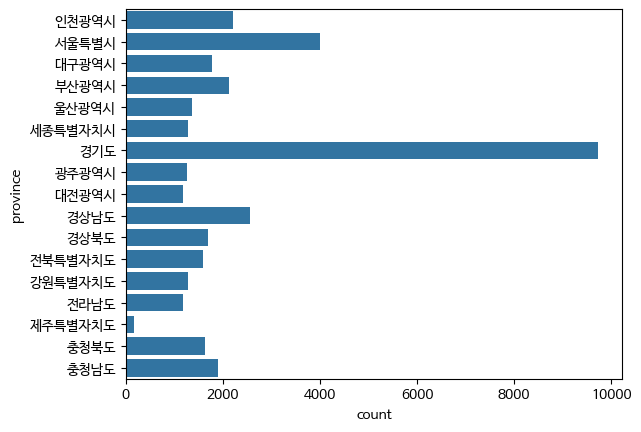

In [61]:
sns.countplot(data=apt, y='province')
plt.show()

In [64]:
top5 = apt.province.value_counts().head()
top5

,count
province,
경기도,9733
서울특별시,4004
경상남도,2559
인천광역시,2212
부산광역시,2134


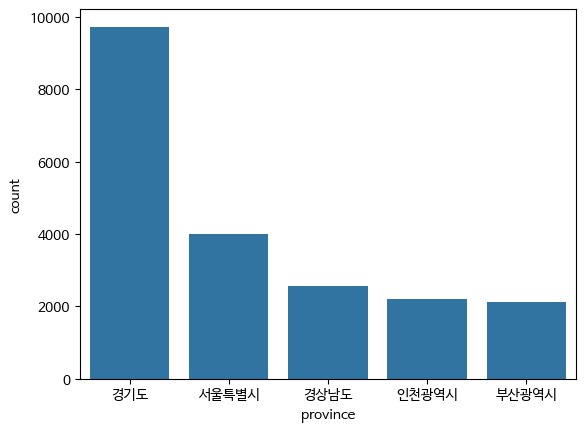

In [66]:
sns.barplot(data=top5)
plt.show()

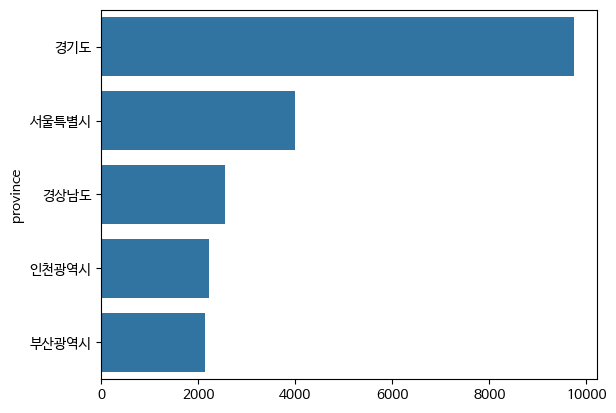

In [67]:
sns.barplot(x=top5.values, y=top5.index)
plt.show()

# 서울 아파트 실거래가 분석

In [68]:
seoul_df = apt[apt.province == '서울특별시']

In [69]:
seoul_df.head(n=7)

,NO,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액,...,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,province,county,year,month
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.930,202504,30,73850,...,1986,마장로42길 16,NaT,직거래,NaN,2025-04-30,서울특별시,성동구,2025,4
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.950,202504,30,86200,...,1997,제기로 131,NaT,중개거래,서울 동대문구,NaT,서울특별시,동대문구,2025,4
7,8,서울특별시 송파구 잠실동,44,44,0,레이크팰리스,84.820,202504,30,262000,...,2006,잠실로 88,NaT,중개거래,"서울 광진구, 서울 송파구",NaT,서울특별시,송파구,2025,4
10,11,서울특별시 영등포구 당산동4가,98,98,0,브라운스톤당산,84.025,202504,30,122000,...,2015,영신로55길 8,NaT,중개거래,"서울 마포구, 서울 영등포구",2025-04-30,서울특별시,영등포구,2025,4
11,12,서울특별시 동대문구 답십리동,1003,1003,0,래미안위브,59.960,202504,30,125800,...,2014,답십리로 130,NaT,중개거래,서울 동대문구,NaT,서울특별시,동대문구,2025,4
12,13,서울특별시 동대문구 답십리동,497-23,497,23,청계푸르지오시티,18.920,202504,30,15200,...,2015,천호대로 257,NaT,중개거래,서울 동대문구,NaT,서울특별시,동대문구,2025,4
13,14,서울특별시 강북구 미아동,1353,1353,0,에스케이북한산시티,84.760,202504,30,72000,...,2004,솔샘로 174,NaT,중개거래,서울 강북구,NaT,서울특별시,강북구,2025,4


## 서울시의 구별 계약 건수, 거래금액 평균, 최솟값, 최댓값

In [70]:
seoul_df.groupby(by=['county'])['거래금액'].agg(['count', 'mean', 'min', 'max'])

,count,mean,min,max
county,,,,
강남구,58,398812.068966,16000,1050000
강동구,237,112508.016878,10200,233000
강북구,77,67638.311688,8500,112000
강서구,242,84419.214876,9500,201000
관악구,150,79354.666667,10300,125000
광진구,116,128171.293103,13900,317000
구로구,208,70238.942308,10700,165000
금천구,47,62259.574468,8900,115500
노원구,308,59265.746753,29500,144000


In [75]:
seoul_by_county = seoul_df.pivot_table(values='거래금액',
                                       index='county',
                                       aggfunc={'거래금액': ['count', 'mean', 'min', 'max']})
seoul_by_county

,count,max,mean,min
county,,,,
강남구,58,1050000,398812.068966,16000
강동구,237,233000,112508.016878,10200
강북구,77,112000,67638.311688,8500
강서구,242,201000,84419.214876,9500
관악구,150,125000,79354.666667,10300
광진구,116,317000,128171.293103,13900
구로구,208,165000,70238.942308,10700
금천구,47,115500,62259.574468,8900
노원구,308,144000,59265.746753,29500


In [76]:
seoul_by_county.columns

Index(['count', 'max', 'mean', 'min'], dtype='object')

In [78]:
seoul_by_county.sort_values(by='count', ascending=False)

,count,max,mean,min
county,,,,
노원구,308,144000,59265.746753,29500
동대문구,263,175500,65352.661597,9000
양천구,259,345000,147008.108108,39000
마포구,253,279500,141033.754941,17000
성동구,253,900000,151408.300395,13000
동작구,252,360000,125075.000000,12000
성북구,252,185000,83057.341270,43000
영등포구,248,488200,140505.447581,9500
강서구,242,201000,84419.214876,9500


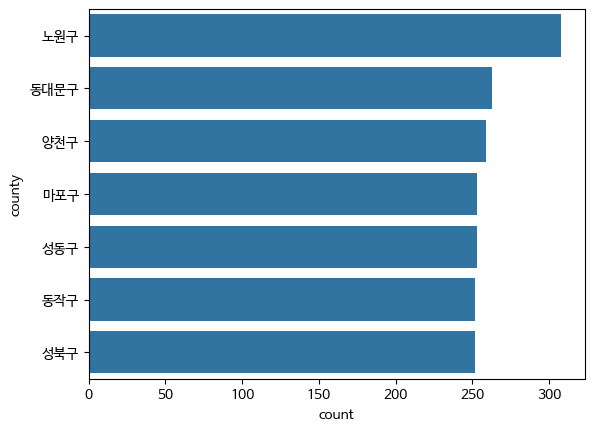

In [80]:
# 서울에서 아파트 계약 건수가 많은 상위 7개 지역을 시각화
seoul_top7 = seoul_by_county.sort_values(by='count', ascending=False).head(n=7)
sns.barplot(data=seoul_top7, x='count', y='county')
plt.show()

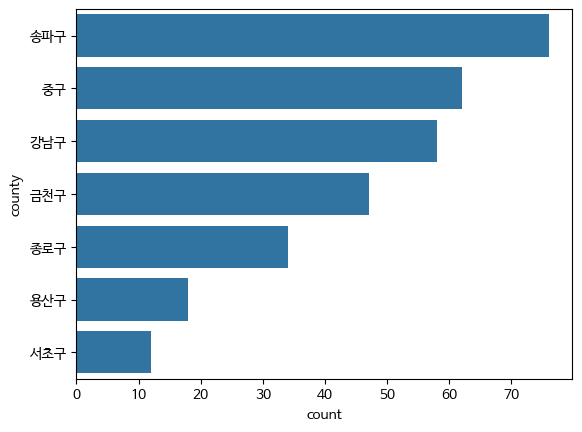

In [82]:
# 서울에서 아파트 계약 건수 하위 7개 지역을 시각화
seoul_bottom7 = seoul_by_county.sort_values(by='count', ascending=False).tail(n=7)
sns.barplot(data=seoul_bottom7, x='count', y='county')
plt.show()

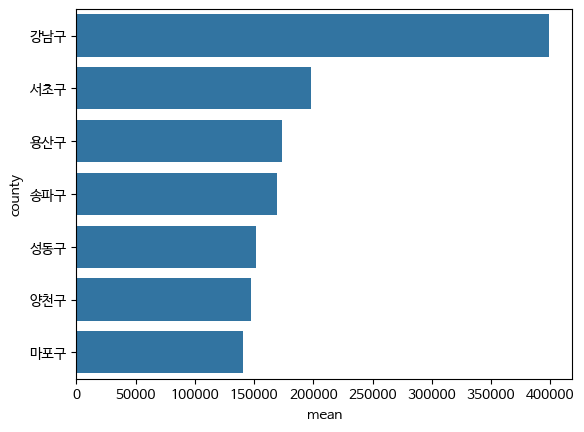

In [87]:
# 서울에서 거래금액 평균 상위 7개 지역 시각화
seoul_top7 = seoul_by_county.sort_values(by='mean', ascending=False).head(n=7)
sns.barplot(data=seoul_top7, x='mean', y='county')
plt.show()

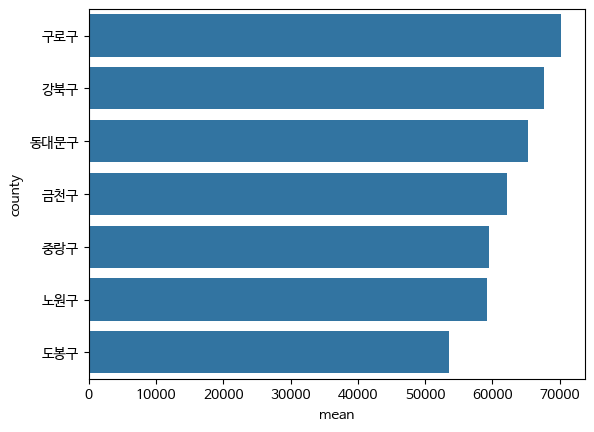

In [88]:
# 서울에서 거래금액 평균 하위 7개 지역 시각화
seoul_bottom7 = seoul_by_county.sort_values(by='mean', ascending=False).tail(n=7)
sns.barplot(data=seoul_bottom7, x='mean', y='county')
plt.show()

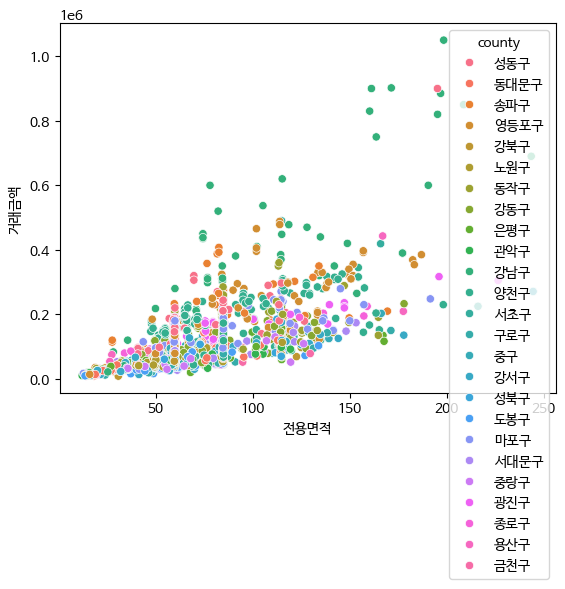

In [106]:
sns.scatterplot(data=seoul_df, x='전용면적', y='거래금액', hue='county')
plt.show()

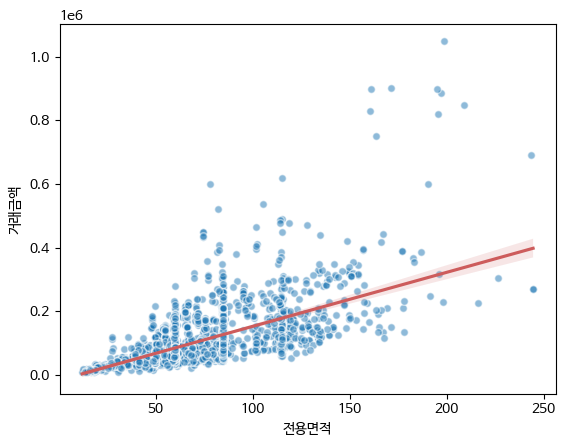

In [105]:
sns.regplot(data=seoul_df, x='전용면적', y='거래금액',
            scatter_kws={'alpha': 0.5, 's': 30, 'edgecolor': 'white'},
            line_kws={'color': 'IndianRed'})
plt.show()

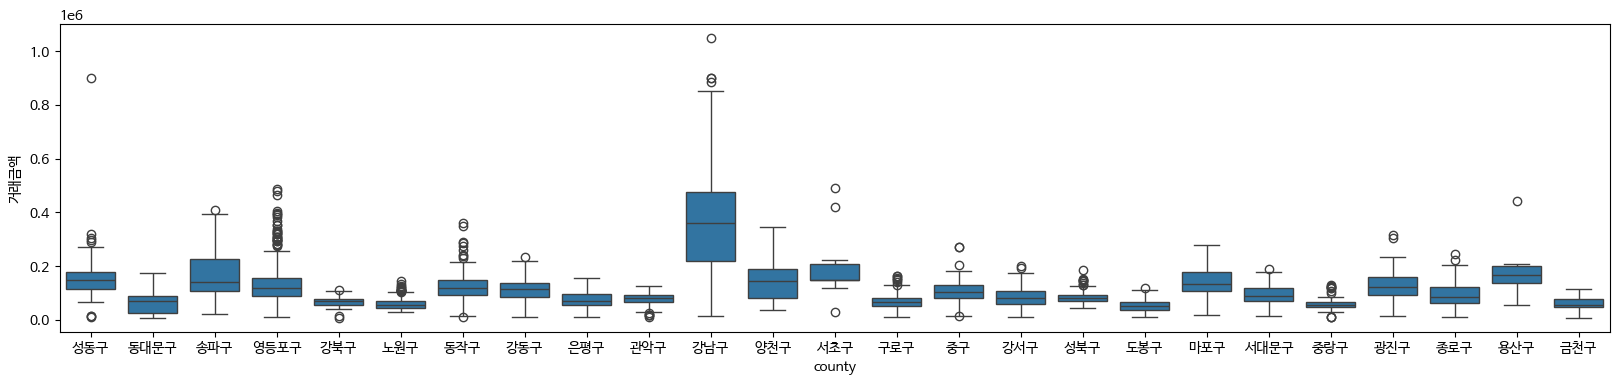

In [108]:
# 서울 구별 아파트 거래금액 box plot
plt.figure(figsize=(20, 4))
sns.boxplot(data=seoul_df, x='county', y='거래금액')
plt.show()

## 전용면적이 $84 m^2$ 이상 $100 m^2$ 미만인 서울의 아파트 거래금액 분석

In [113]:
seoul_midsize_df = seoul_df[(seoul_df['전용면적'] >= 84) &
                            (seoul_df['전용면적'] < 100)]
seoul_midsize_df.head()

,NO,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액,...,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,province,county,year,month
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.930,202504,30,73850,...,1986,마장로42길 16,NaT,직거래,NaN,2025-04-30,서울특별시,성동구,2025,4
7,8,서울특별시 송파구 잠실동,44,44,0,레이크팰리스,84.820,202504,30,262000,...,2006,잠실로 88,NaT,중개거래,"서울 광진구, 서울 송파구",NaT,서울특별시,송파구,2025,4
10,11,서울특별시 영등포구 당산동4가,98,98,0,브라운스톤당산,84.025,202504,30,122000,...,2015,영신로55길 8,NaT,중개거래,"서울 마포구, 서울 영등포구",2025-04-30,서울특별시,영등포구,2025,4
13,14,서울특별시 강북구 미아동,1353,1353,0,에스케이북한산시티,84.760,202504,30,72000,...,2004,솔샘로 174,NaT,중개거래,서울 강북구,NaT,서울특별시,강북구,2025,4
28,29,서울특별시 동작구 흑석동,339,339,0,흑석한강센트레빌Ⅱ,84.946,202504,30,172000,...,2012,서달로 91,NaT,중개거래,서울 동작구,NaT,서울특별시,동작구,2025,4
